In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Importing and performing EDA

In [3]:
df = pd.read_csv("playstore-analysis (2) (1).csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


> Some columns have missing values <br><br>
> Also, price is of object type

In [6]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# Tasks

## 1. Data clean up – Missing value treatment

### a. Drop records where rating is missing since rating is our target/study variable

In [7]:
df.dropna(subset = ['Rating'], inplace = True)

In [8]:
# Checking if the rows were dropped
df.shape

(9367, 13)

Rows dropping confirmed.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   float64
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


### b. Check the null values for the Android Ver column.

In [10]:
df['Android Ver'].isna().sum()

3

#### i. Are all 3 records having the same problem?

In [11]:
df[df['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Yes, all the 3 have the values as Nan.

#### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [12]:
df.shape

(9367, 13)

In [13]:
df = df[~ (df['App'] == "Life Made WI-Fi Touchscreen Photo Frame")]

In [14]:
df.shape

(9366, 13)

#### iii. Replace remaining missing values with the mode

In [15]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace = True)

In [16]:
# Confirming if missing values have been imputed
df['Android Ver'].isna().sum()

0

Missing values imputed for "Android Ver" column

### c. Current ver – replace with most common value

In [17]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace = True)

In [18]:
# Confirming if missing values have been imputed
df['Current Ver'].isna().sum()

0

Missing values imputed for "Current Ver" column

In [19]:
# Confirming if missing values have been imputed
df['Current Ver'].isna().sum()

0

## 2. Data clean up – correcting the data types

### a. Which all variables need to be brought to numeric types?

In [20]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Installs, Price and Reviews are the only columns whose data-type that needs to be converted to numeric to perform further analysis

### b. Price variable – remove $ sign and convert to float

In [21]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [22]:
df['Price'] = df['Price'].apply(lambda x: x.lstrip('$'))

In [23]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [24]:
df['Price'] = pd.to_numeric(df['Price'])

In [25]:
df['Price'].dtypes

dtype('float64')

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [26]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [27]:
df['Installs'].replace(to_replace = ',', value = '', regex = True, inplace = True)

In [28]:
df['Installs'] = df['Installs'].apply(lambda x: x.rstrip('+'))

In [29]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

In [30]:
df['Installs'] = pd.to_numeric(df['Installs'])

### d. Convert all other identified columns to numeric

In [31]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [32]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 3. Sanity checks – check for the following and handle accordingly

### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [33]:
df['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

The range of rating's column is between 1 and 5 which is evident from the min and max values

#### i. Are there any such records? Drop if so.

No records out of the specified range exists.

### b. Reviews should not be more than installs as only those who installed can review the app.

#### i. Are there any such records? Drop if so.

In [34]:
sum(df['Reviews'] > df['Installs'])

7

There are 7 records violating the sanity <br><br>

In [35]:
df.shape

(9366, 13)

Dropping these records...

In [36]:
df = df[~(df['Reviews'] > df['Installs'])]

In [37]:
df.shape

(9359, 13)

## 4. Identify and handle outliers –

### a. Price column

#### i. Make suitable plot to identify outliers in price

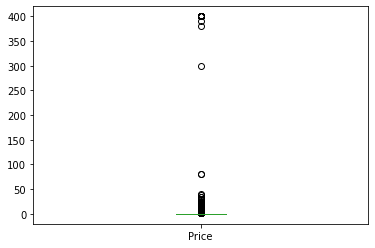

In [38]:
df['Price'].plot(kind = 'box')
plt.show()

<AxesSubplot:xlabel='Price'>

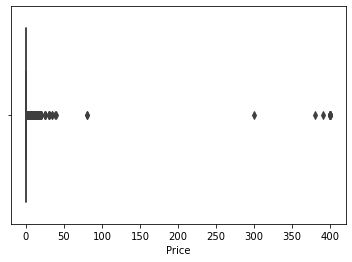

In [39]:
sns.boxplot(data = df, x = 'Price')

#### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [40]:
df[df["Price"] >= 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [41]:
df[df["Price"] >= 200].shape

(15, 13)

No, these are junk apps under the names like "I am Rich"

#### iii. After dropping the useless records, make the suitable plot again to identify outliers

In [42]:
df.shape

(9359, 13)

In [43]:
df = df[df['Price'] <= 200]

In [44]:
df.shape

(9344, 13)

<AxesSubplot:>

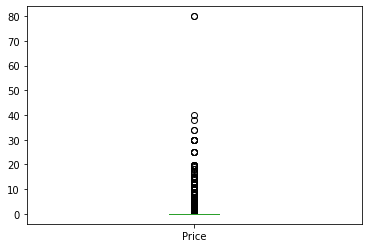

In [45]:
df['Price'].plot(kind = 'box')

<AxesSubplot:xlabel='Price'>

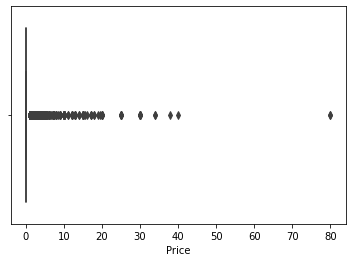

In [46]:
sns.boxplot(data = df, x = 'Price')

#### iv. Limit data to records with price < $30

<AxesSubplot:>

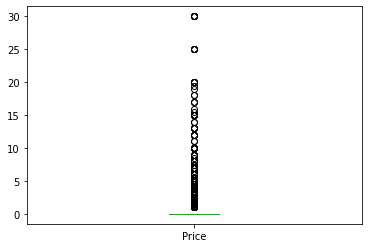

In [47]:
df[df['Price'] < 30]['Price'].plot(kind = 'box')

C:\Users\Shraddha Shelar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

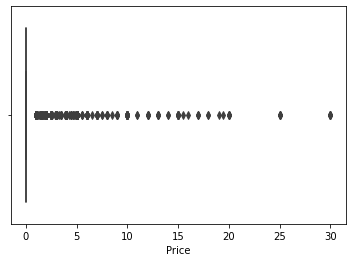

In [48]:
sns.boxplot(df[df['Price'] < 30]['Price'])

### b. Reviews column

#### i. Make suitable plot

<AxesSubplot:>

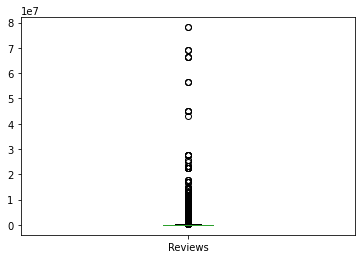

In [49]:
df['Reviews'].plot(kind = 'box')

<AxesSubplot:xlabel='Reviews'>

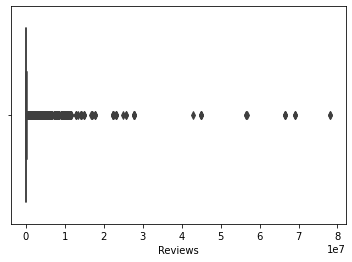

In [50]:
sns.boxplot(data = df, x = 'Reviews')

#### ii. Limit data to apps with < 1 Million reviews

<AxesSubplot:>

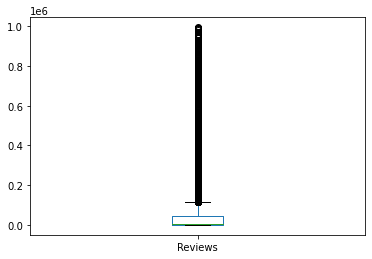

In [51]:
df[df['Reviews'] < 1000000]['Reviews'].plot(kind = 'box')

C:\Users\Shraddha Shelar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

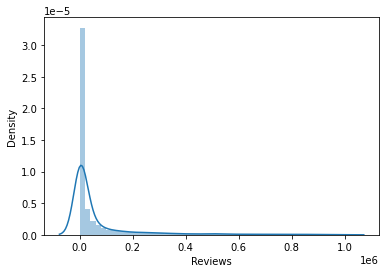

In [52]:
sns.distplot(df[df['Reviews'] < 1000000]['Reviews'])

C:\Users\Shraddha Shelar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Reviews'>

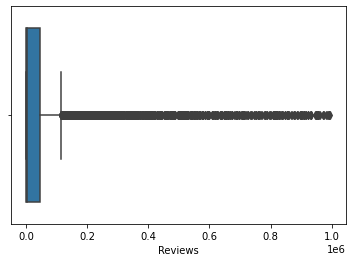

In [53]:
sns.boxplot(df[df['Reviews'] < 1000000]['Reviews'])

### c. Installs

#### i. What is the 95th percentile of the installs?

In [54]:
df['Installs'].quantile(0.95)

100000000.0

100M is the 95th percentile for installs columns

#### ii. Drop records having a value more than the 95th percentile

In [55]:
df.shape

(9344, 13)

In [56]:
df = df[~(df['Installs'] > df['Installs'].quantile(0.95))]

In [57]:
df.shape

(9214, 13)

# Data analysis to answer business questions

## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

C:\Users\Shraddha Shelar\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

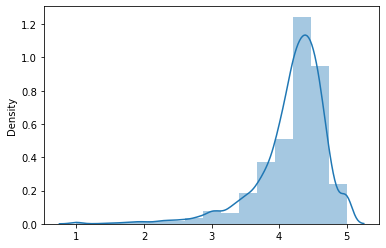

In [58]:
sns.distplot(x = df['Rating'], bins = 15)

In [59]:
df['Rating'].skew()

-1.8416513505231236

The distribution is negatively skewed (mean < median < mode)

### b. What is the implication of this on your analysis?

Since the distribution is left skewed the left tail is treated as an outlier and can adversely affect the model’s performance especially regression-based models. So, taking this into consideration we must employ outlier robust based models like tree-based models or can transform the data using transformation techniques such as the log transform

## 6. What are the top Content Rating values?

### a. Are there any values with very few records?

In [60]:
df['Content Rating'].value_counts(normalize = True, ascending = True)*100

Unrated             0.010853
Adults only 18+     0.032559
Everyone 10+        4.210983
Mature 17+          4.970697
Teen               11.449967
Everyone           79.324940
Name: Content Rating, dtype: float64

Yes, 'Unrated' and 'Adults only 18+' ocuupy ~0.05% of the data and hence can be dropped

### b. If yes, drop those as they won’t help in the analysis

In [61]:
df.shape

(9214, 13)

In [62]:
df = df[~(df['Content Rating'].isin(df['Content Rating'].value_counts(ascending = True)[:2].index.to_list()))]

In [63]:
df.shape

(9210, 13)

## 7. Effect of size on rating

### a. Make a joinplot to understand the effect of size on rating

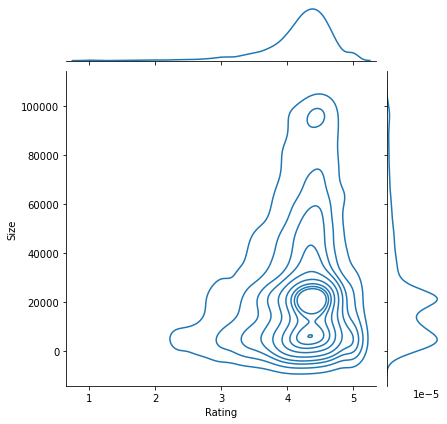

In [64]:
sns.jointplot(x = 'Rating', y = 'Size', data = df, kind = 'kde')

### b. Do you see any patterns?

Yes, there's a pattern

### c. How do you explain the pattern?

Higher ratings tend to have smaller size, then start setlling down but again with a peak around 100000KB (100 MB)

## 8. Effect of price on rating

### a. Make a jointplot (with regression line)

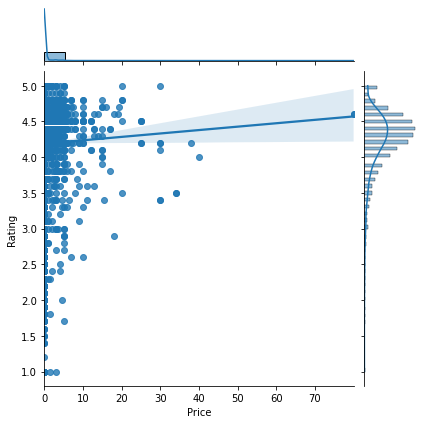

In [65]:
sns.jointplot(x= 'Price', y = 'Rating', data = df, kind = 'reg')

### b. What pattern do you see?

Yes, a trend is observed

## c. How do you explain the pattern?

The rating doesn't tend to go above 4.5 for higher priced apps

### d. Replot the data, this time with only records with price > 0

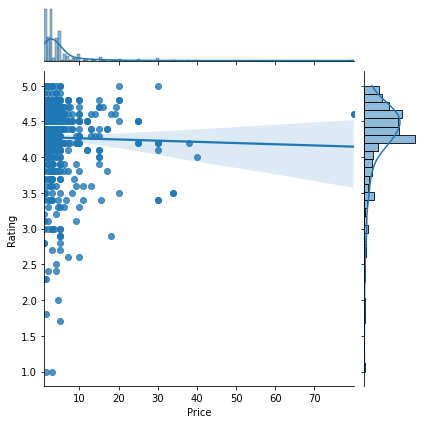

In [66]:
sns.jointplot(x= 'Price', y = 'Rating', data = df[df['Price'] > 0], kind = 'reg')

### e. Does the pattern change?

Yes, there's a change.

### f. What is your overall inference on the effect of price on the rating

Slight change in the rating pattern

In [67]:
df.corr()['Rating']

Rating      1.000000
Reviews     0.104694
Size        0.076585
Installs    0.126650
Price       0.020139
Name: Rating, dtype: float64

In [68]:
df[df['Price'] > 0].corr()['Rating']

Rating      1.000000
Reviews     0.042835
Size        0.108457
Installs    0.058395
Price      -0.020949
Name: Rating, dtype: float64

Correlation is now towards the negative side if price > 0 i.e., there's a weak negative co-relation as compared to weak postive co-relation earlier.

## 9. Look at all the numeric interactions together –

### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

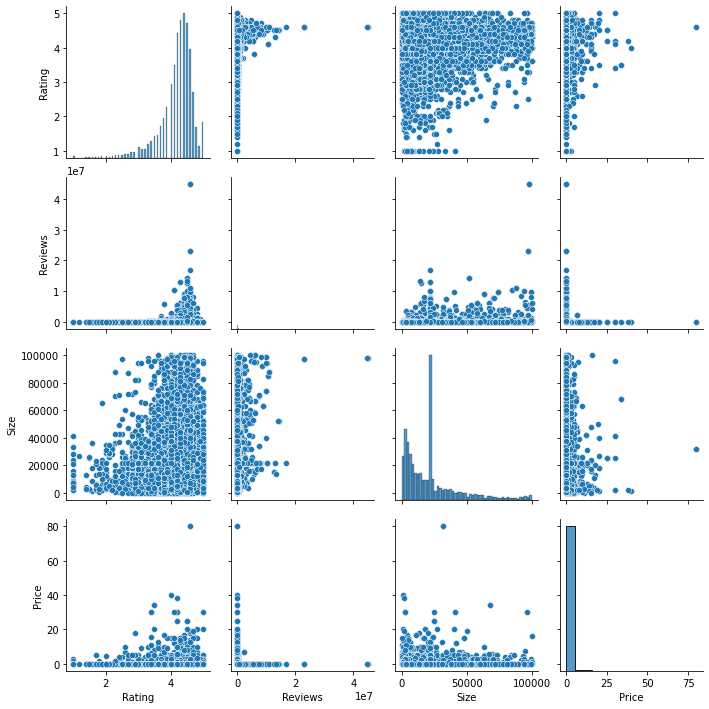

In [69]:
sns.pairplot(df, vars = ['Rating', 'Reviews', 'Size', 'Price'])

## 10. Rating vs. content rating

### a. Make a bar plot displaying the rating for each content rating

<AxesSubplot:xlabel='Content Rating'>

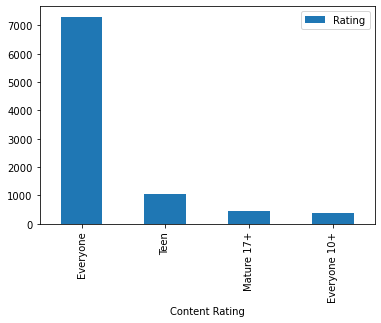

In [70]:
df.groupby('Content Rating').agg({'Rating': 'count'}).sort_values(by = 'Rating', ascending = False).plot(kind = 'bar')

### b. Which metric would you use? Mean? Median? Some other quantile?

<AxesSubplot:>

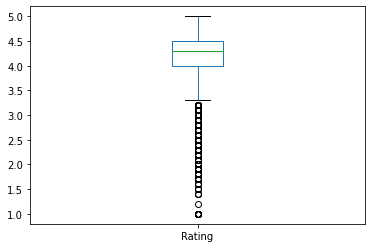

In [71]:
df['Rating'].plot(kind = 'box')

Since the column has outliers towards to lower rating and it is a numeric column, median will be a better measure

### c. Choose the right metric and plot

<AxesSubplot:xlabel='Content Rating'>

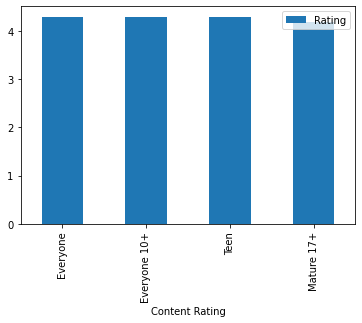

In [72]:
df.groupby('Content Rating').agg({'Rating': 'median'}).sort_values(by = 'Rating', ascending = False).plot(kind = 'bar')

## 11. Content rating vs. size vs. rating – 3 variables at a time

### a. Create 5 buckets (20% records in each) based on Size

In [73]:
df['Size Buckets'] = pd.cut(df['Size'], bins = [0, 20000, 40000, 60000, 80000, 100000], \
                            labels = ['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])

### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [74]:
temp = df.pivot_table(index = 'Content Rating', columns = 'Size Buckets', values = 'Rating', \
                      aggfunc = lambda x: np.quantile(x, 0.20).round(2))
temp

Size Buckets,0-20k,20k-40k,40k-60k,60k-80k,80k-100k
Content Rating,,,,,
Everyone,3.80,4.0,3.9,4.0,4.1
Everyone 10+,4.02,4.0,4.1,4.2,4.3
Mature 17+,3.50,4.0,4.1,4.0,4.0
Teen,3.90,4.0,4.0,4.0,4.1


### c. Make a heatmap of this

#### i. Annotated

<AxesSubplot:xlabel='Size Buckets', ylabel='Content Rating'>

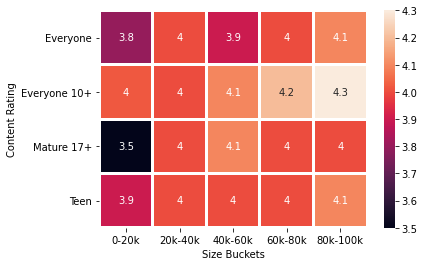

In [75]:
sns.heatmap(data = temp, linewidths = 2, annot = True)

#### ii. Greens color map

<AxesSubplot:xlabel='Size Buckets', ylabel='Content Rating'>

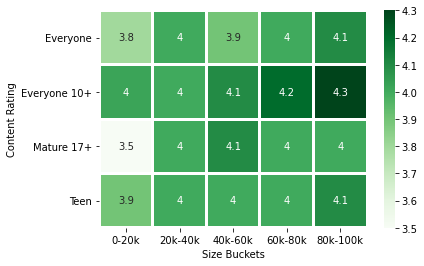

In [76]:
sns.heatmap(data = temp, linewidths = 2, annot = True, cmap = 'Greens')

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

> No lighter apps are not preferred in all categories, because apps with size >40k-60k tend to have better rating in all categories with the exception of 40-80k for Everyone category. <br><br>
> Heavier apps are preferred in all categories.